In [1]:
# General System Imports
import os
import sys

# Scientific libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import zscore
import scipy.io

# Local code 
sys.path.append(os.path.join(os.getcwd(), "..", "code"))
from cluster_functions import cluster_analysis

# The diretory for saving figures - Change to place of your choice
figDir = os.path.expanduser('~/Desktop/')

# The standard color table of Etho Call-types
callColor = {
        'Be':(0/255.0, 230/255.0, 255/255.0),
        'BE':(0/255.0, 230/255.0, 255/255.0),
        'Tu':(255/255.0, 200/255.0, 65/255.0),
        'TU':(255/255.0, 200/255.0, 65/255.0),
        'Th':(255/255.0, 150/255.0, 40/255.0),
        'TH':(255/255.0, 150/255.0, 40/255.0),
        'Alarm':(255/255.0, 200/255.0, 65/255.0),
        'Di':(255/255.0, 105/255.0, 15/255.0),
        'DI':(255/255.0, 105/255.0, 15/255.0),
        'Ag':(255/255.0, 0/255.0, 0/255.0),
        'AG':(255/255.0, 0/255.0, 0/255.0),
        'Fight':(255/255.0, 105/255.0, 15/255.0),
        'Wh':(255/255.0, 180/255.0, 255/255.0),
        'WH':(255/255.0, 180/255.0, 255/255.0),
        'Ne':(255/255.0, 100/255.0, 255/255.0),
        'NE':(255/255.0, 100/255.0, 255/255.0),
        'Te':(140/255.0, 100/255.0, 185/255.0),
        'TE':(140/255.0, 100/255.0, 185/255.0),
        'Soft':(255/255.0, 180/255.0, 255/255.0),
        'DC':(100/255.0, 50/255.0, 200/255.0),
        'LT':(0/255.0, 95/255.0, 255/255.0),
        'Loud':(100/255.0, 50/255.0, 200/255.0),
        'song':(0, 0, 0),
        'So':(0,0,0), 
        'SO':(0,0,0),
        'In': (0.49,0.60,0.55), 
        'Mo':(0.69,0.39,0.39),
        'Ri':(0,255/255.0,0),
        'WC': (.25, .25, .25)}

/Users/frederictheunissen/anaconda3/envs/bioacoustics/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/frederictheunissen/anaconda3/envs/bioacoustics/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/frederictheunissen/anacon

In [2]:
# Now the acoustic analysis

# Loading the acoustical features of the Etho call-type database as used in Elie and Theunissen. Animal Cognition (2016).

# The data directory
soundAnalysisDir = '../data/acoustic/' 

matPCSpectro = scipy.io.loadmat(soundAnalysisDir+'vocTypeSpectroData.mat')
# Predefined Acoustical Features (PAFs)
vocSelTable = pd.read_hdf(soundAnalysisDir+'vocParamTable.h5')



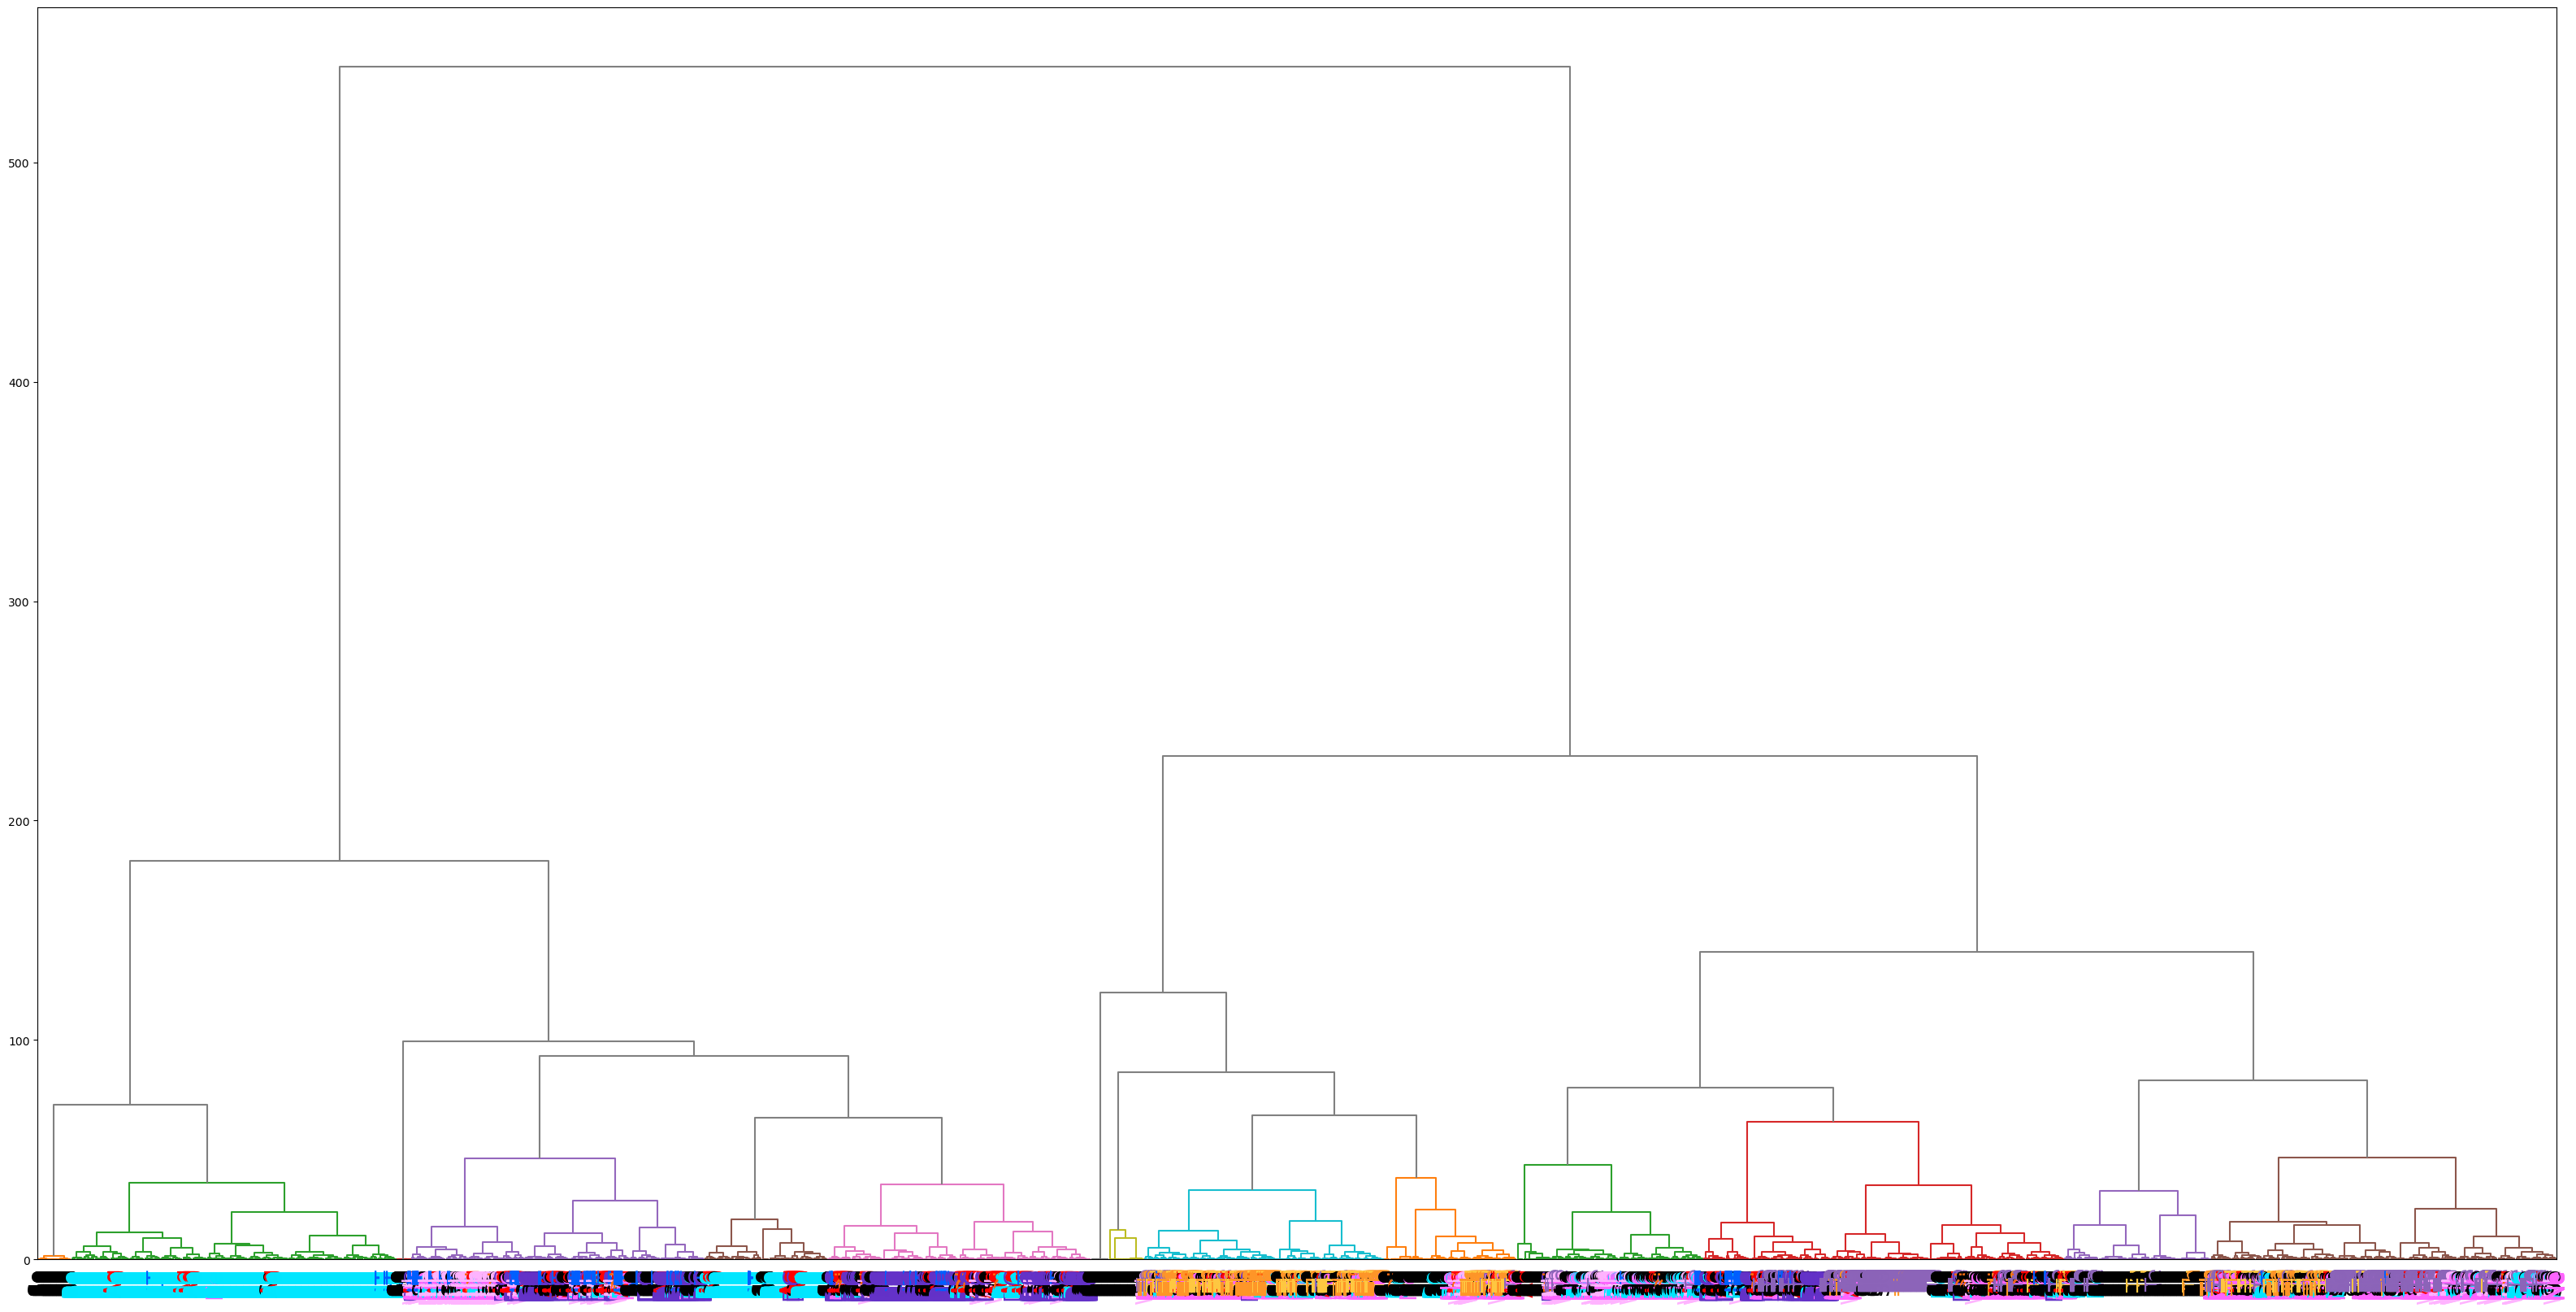

ARI Score 0.182


In [3]:
# Unsupervised clustering of acoustic based on PC

spectroPCs = matPCSpectro['Score50']
fine_semantic = np.concatenate(matPCSpectro['vocTypeCuts'][0]).ravel()

np.random.seed(137)
a,ariScore,c,g2,gg2,t2 = cluster_analysis(spectroPCs,fine_semantic,and_plot=True,dr_method='umap',save=figDir + 'Spectro_Aud_UMAP.eps',score='ari')

print('ARI Score %.3f' % ariScore)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


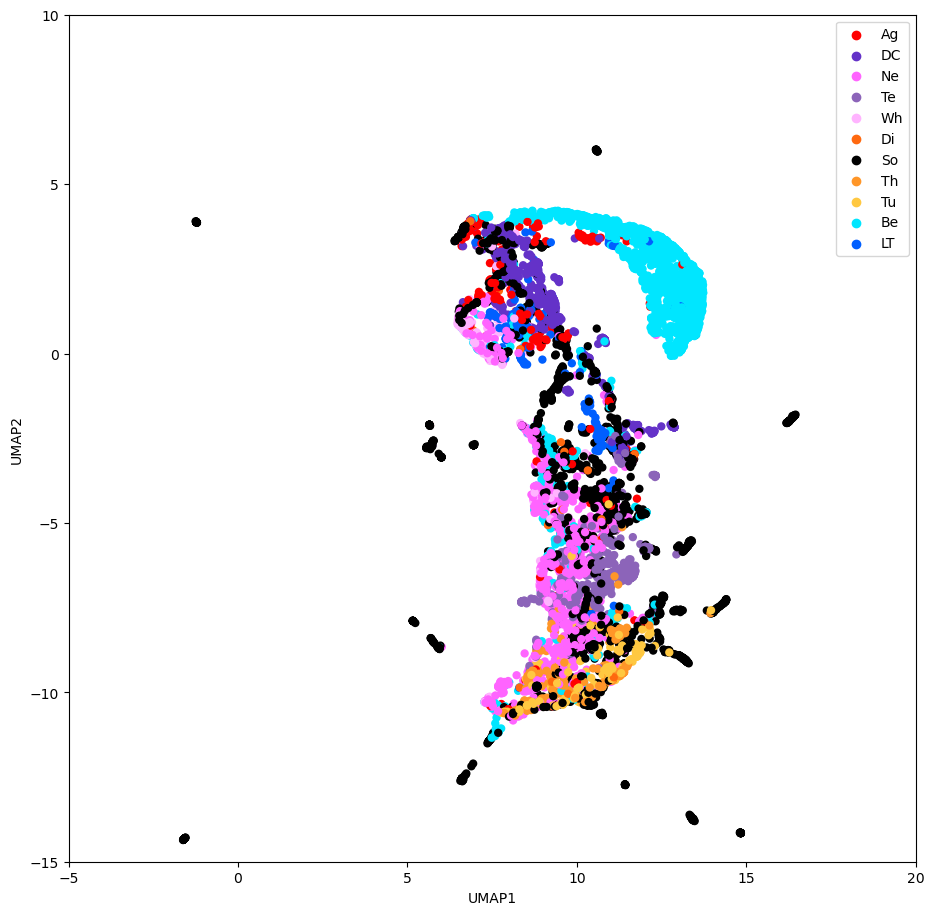

In [4]:
# Plot the Spectrogram based UMAP

plt.figure(figsize=(20,11))
sns.scatterplot(x=c[:,1],y=-c[:,0],hue = np.squeeze(fine_semantic),palette=callColor,edgecolors=None,linewidth=0)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.axis('square')
plt.xlim((-5,20))
plt.ylim((-15,10))
plt.savefig(figDir + "spectro_UMAP_plot.eps")

In [5]:
# Creating the predefined acoustic features calculated using soundsig.
#These will be the features used to create linkages between the calls in the stimuli set or full bank

#These will be dimension len(numberofcallsinthedataset) by len(numberoffeatures contatenated)
XfundNames = np.hstack(('sal', 'fund','maxfund','minfund','cvfund')) #concatenating said features as labels of columns
Xfund = [vocSelTable.loc[:,col] for col in XfundNames ]
Xfund = np.stack(Xfund, axis=1) #only contains something like headers

XspectNames = np.hstack(('meanS', 'stdS', 'skewS', 'kurtS', 'entS', 'q1', 'q2', 'q3'))
Xspect = [vocSelTable.loc[:,col] for col in XspectNames ]
Xspect = np.stack(Xspect, axis=1)#only contains something like headers

XtempNames = np.hstack(('meanT', 'stdT', 'skewT', 'kurtT', 'entT'))
Xtemp = [vocSelTable.loc[:,col] for col in XtempNames ]
Xtemp = np.stack(Xtemp, axis=1)#only contains something like headers

XintensityNames = np.array(('rms', 'maxAmp'))
Xintensity = [vocSelTable.loc[:,col] for col in XintensityNames ]
Xintensity = np.stack(Xintensity, axis=1)#only contains something like headers

Xall = np.hstack((Xfund, Xspect, Xtemp, Xintensity))
XallNames = np.hstack((XfundNames, XspectNames, XtempNames, XintensityNames))
#np.save(os.path.join(outdir, 'feature_names_all7943'), XallNames)

# Z score all data that is not nan and make corresponding arrays for bird id and call type
nonanInd = (np.sum(np.isnan(Xall), axis = 1) == 0)
Xfundz = zscore(Xfund[nonanInd], axis=0)
Xspectz = zscore(Xspect[nonanInd], axis=0)
Xtempz = zscore(Xtemp[nonanInd], axis=0)
Xintensityz = zscore(Xintensity[nonanInd], axis=0)
Xallz = zscore(Xall[nonanInd], axis=0)

#this contains all the usable call types from vocSelTable
fine_semantic = np.array(vocSelTable['calltype'])[nonanInd] #previously vocSelTableGroupedAgg
fine_semantic[fine_semantic == '-A'] = 'Ag'  # Fixing some labels for agressive

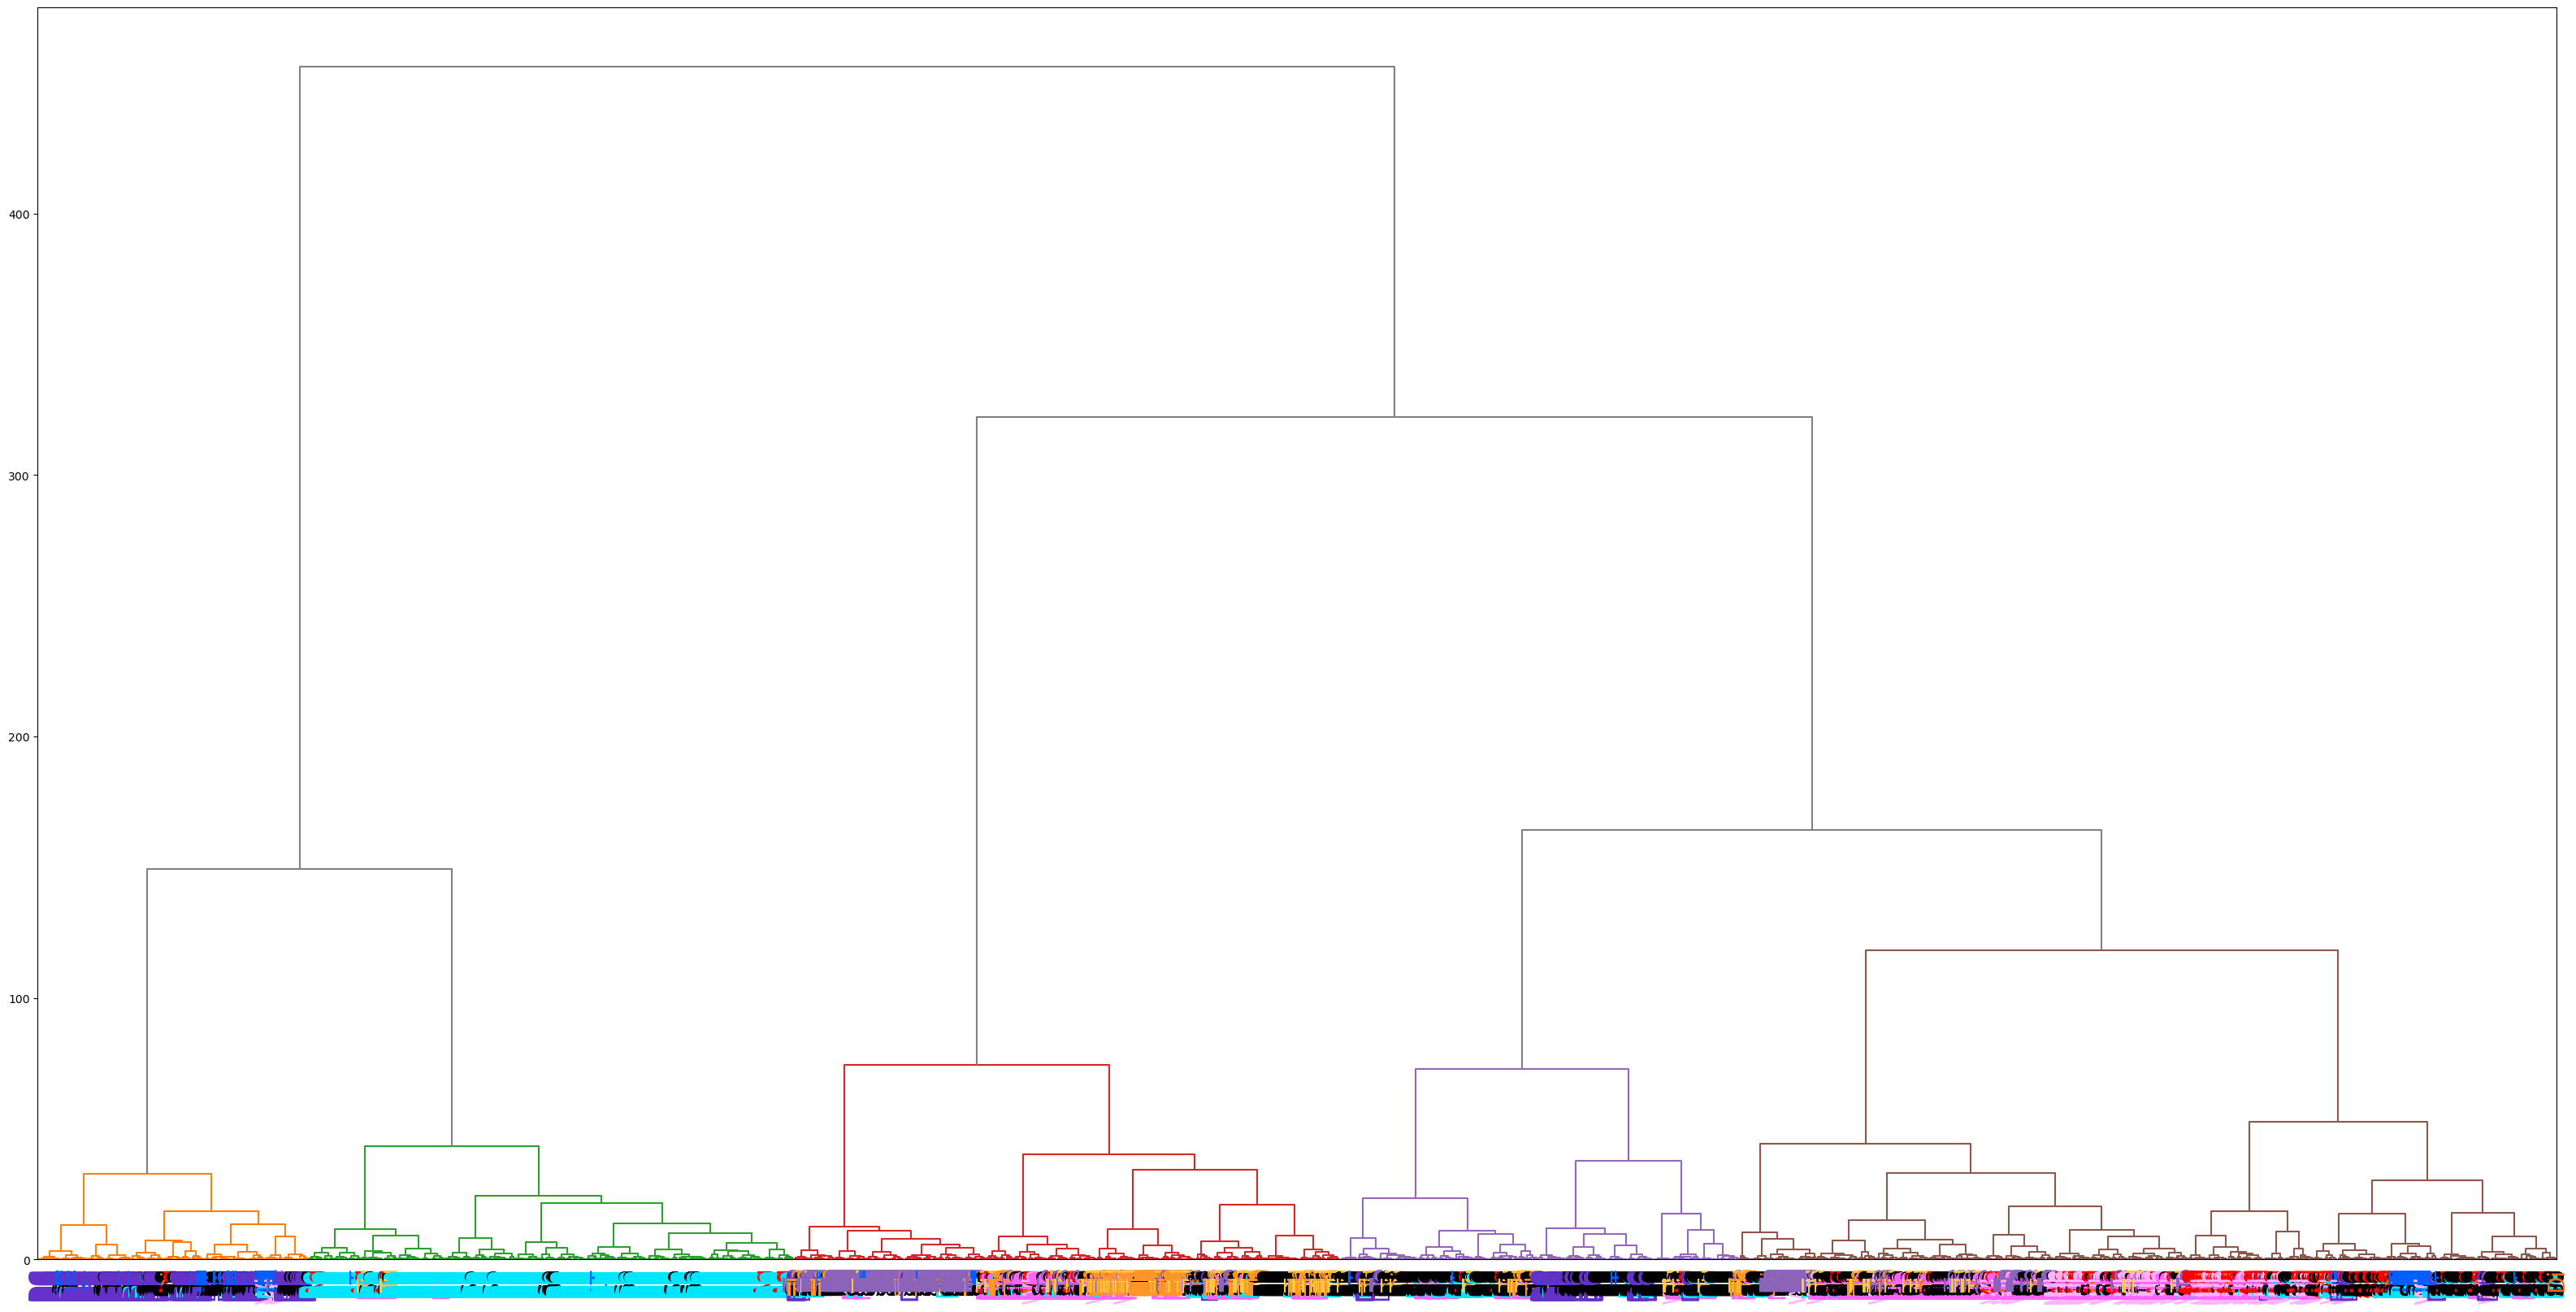

ARI Score 0.463


In [6]:
# Unsupervised Clustering Using PAFs

np.random.seed(137)
a,ariScore,c,g2,gg2,t2 = cluster_analysis(Xallz,np.squeeze(fine_semantic),and_plot=True,dr_method='umap',save= figDir + '/PAF_Aud_UMAP.eps',score='ari')

print('ARI Score %.3f' % ariScore)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


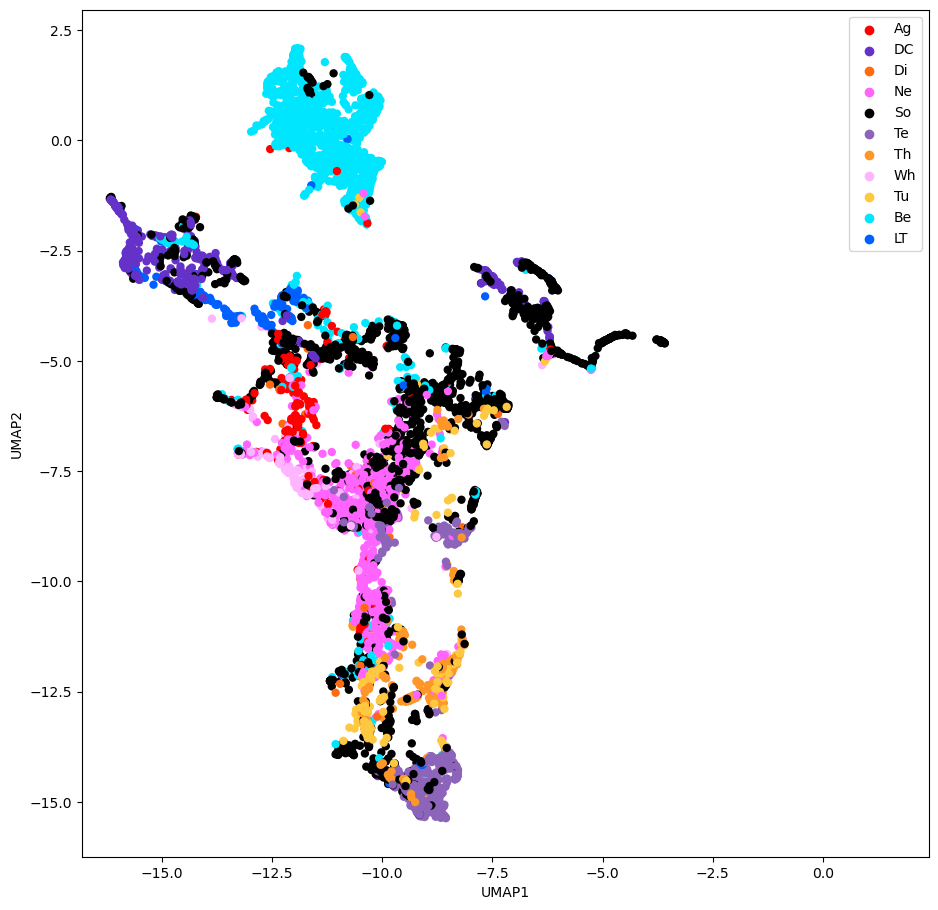

In [7]:
# Plot the PAF based UMAP

plt.figure(figsize=(20,11))
sns.scatterplot(x=-c[:,0],y=-c[:,1],hue = np.squeeze(fine_semantic),palette=callColor,edgecolors=None,linewidth=0)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.axis('square')
#plt.xlim((-5,20))
#plt.ylim((-15,10))
plt.savefig(figDir + "PAF_UMAP_plot.eps")